In [1]:
import numpy as np
import pickle
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import matplotlib.colorbar as cbar

In [2]:
with open('eval_results.pkl', 'rb') as f:
# with open('eval_results_hvraa.pkl', 'rb') as f:
    eval_results = pickle.load(f)

In [3]:
binHeight = 15
binWidth = 15
numItems = 10

In [4]:
# placement: [w h x]

/home/xiaoyang/.local/lib/python3.6/site-packages/ipykernel_launcher.py:16: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  app.launch_new_instance()


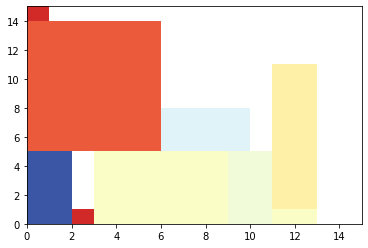

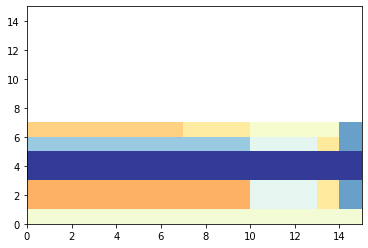

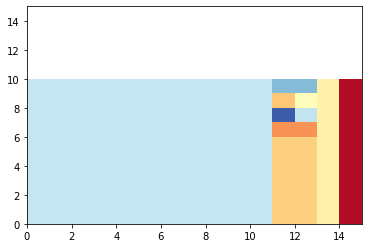

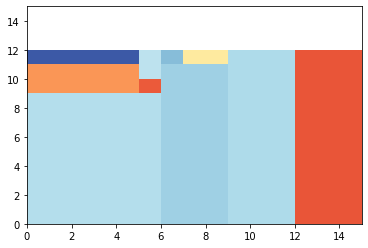

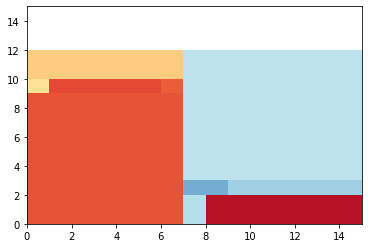

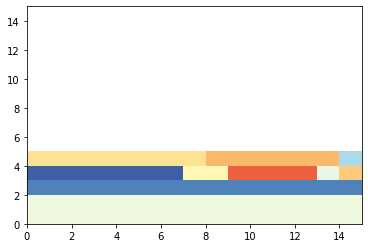

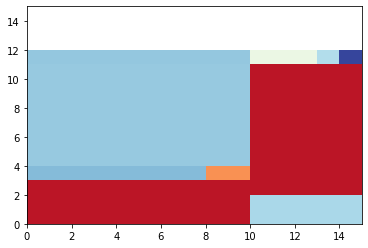

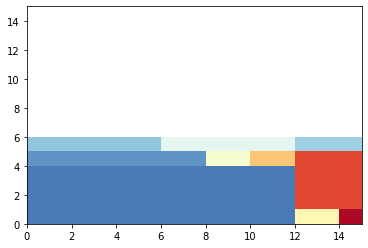

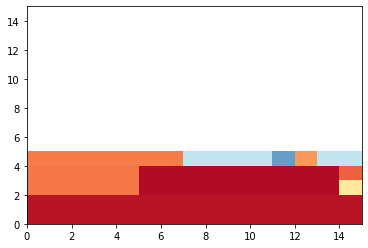

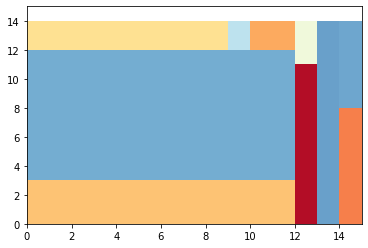

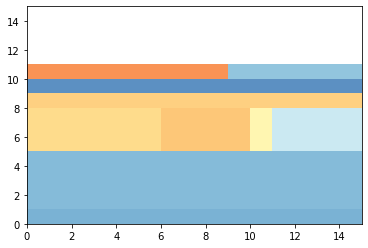

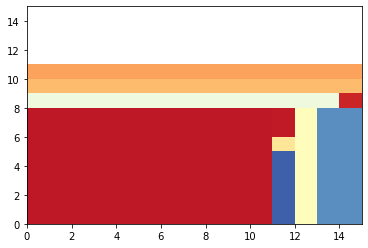

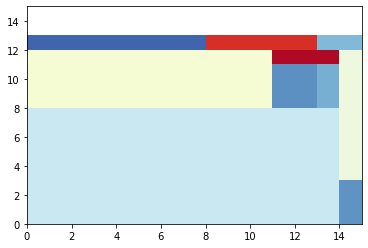

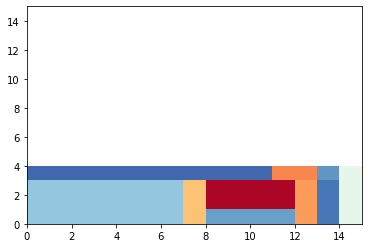

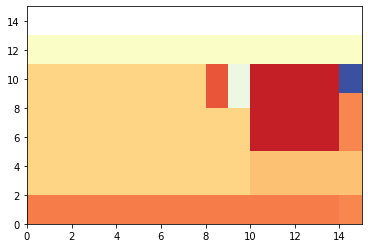

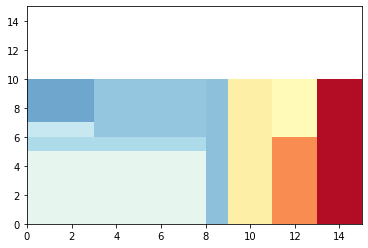

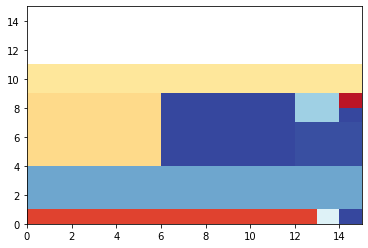

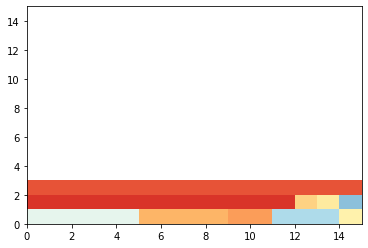

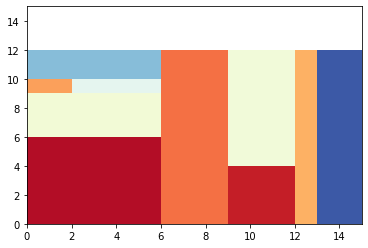

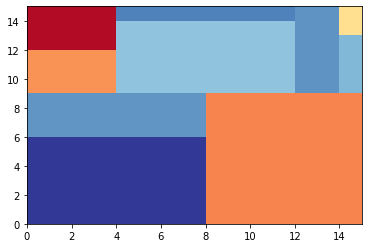

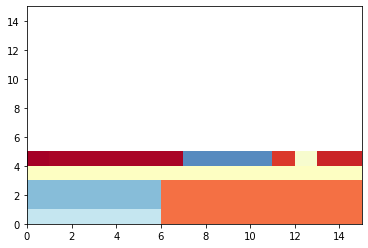

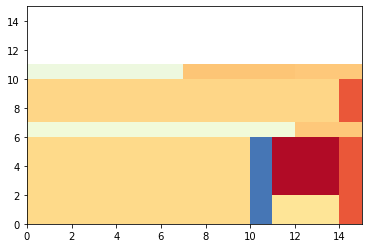

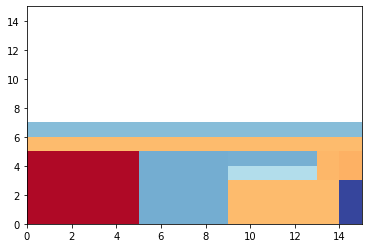

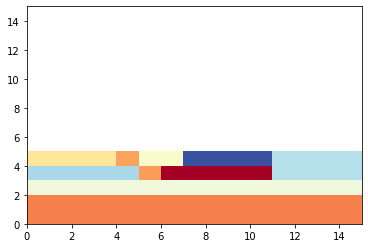

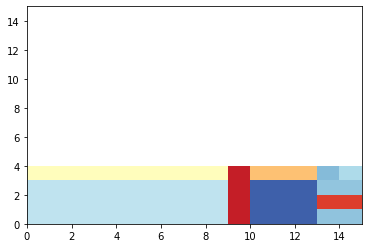

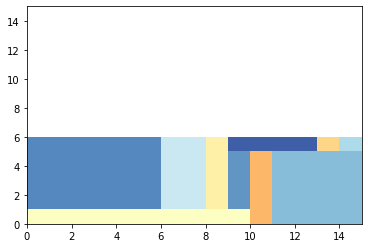

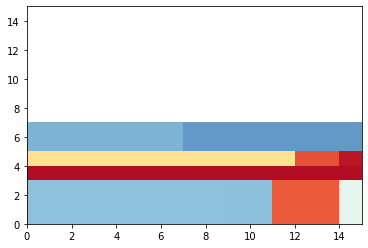

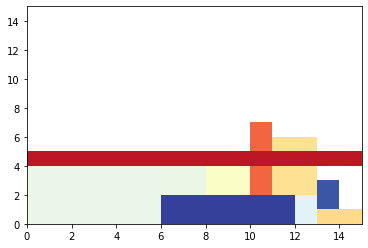

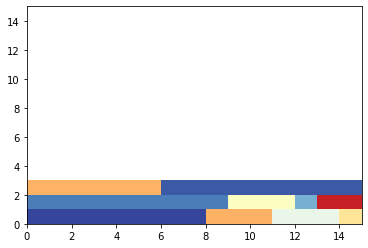

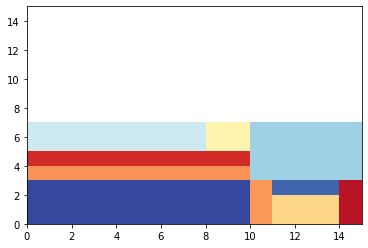

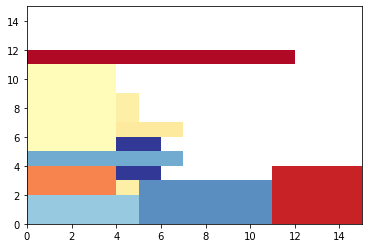

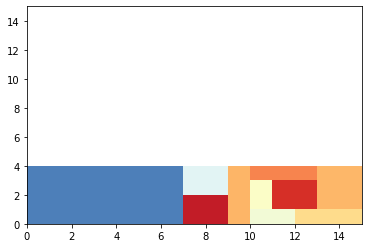

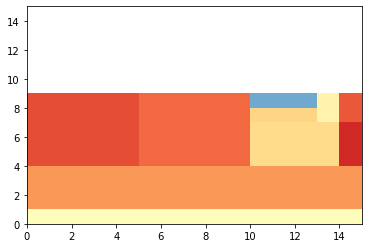

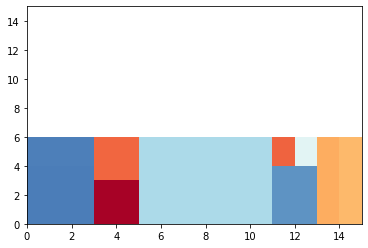

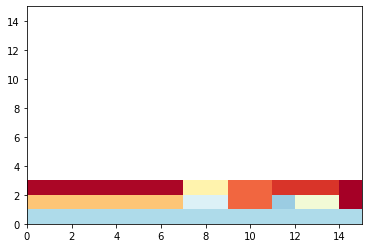

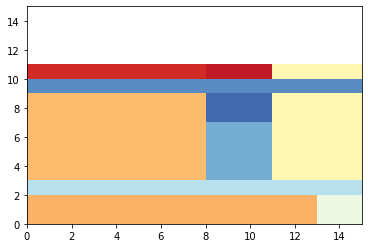

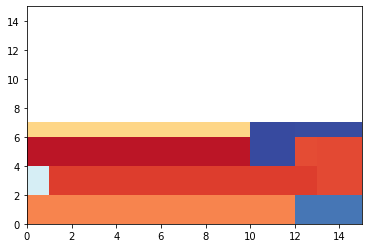

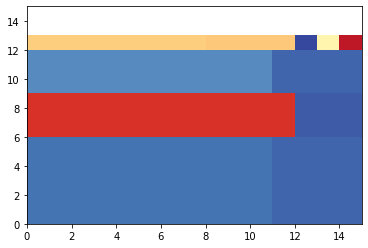

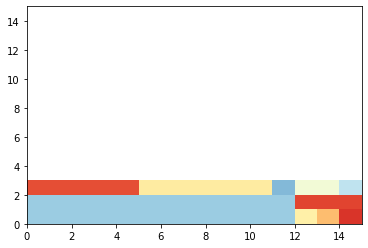

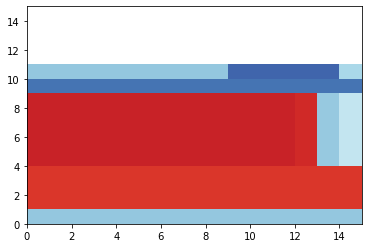

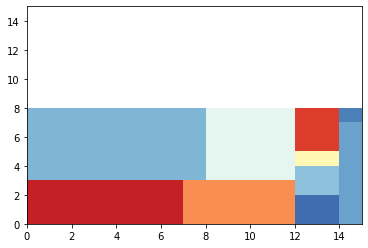

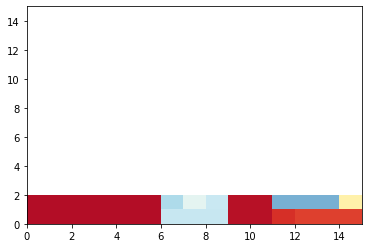

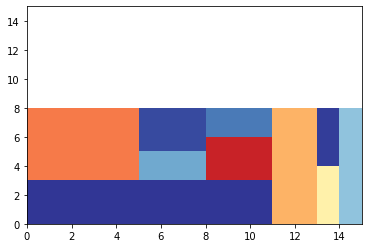

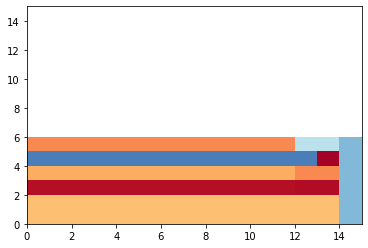

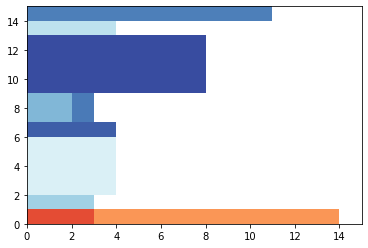

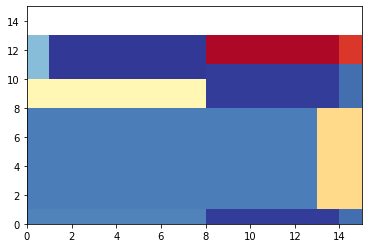

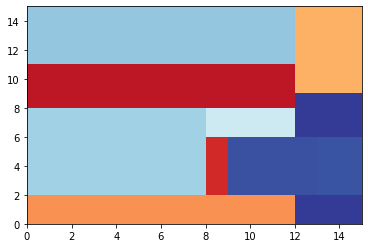

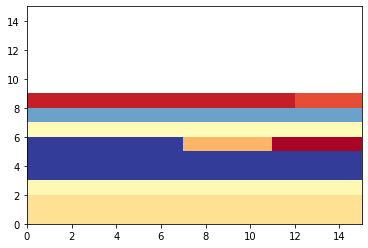

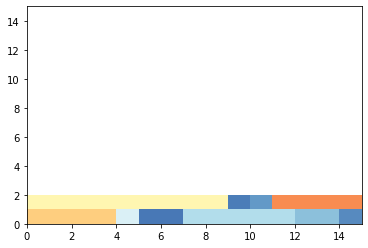

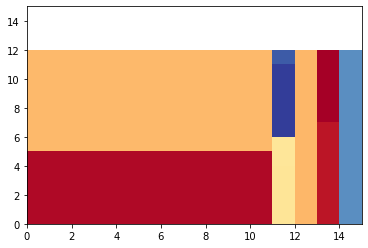

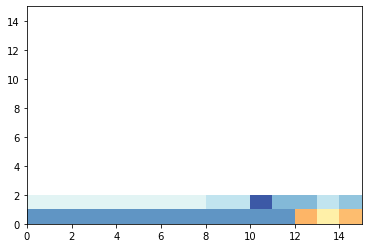

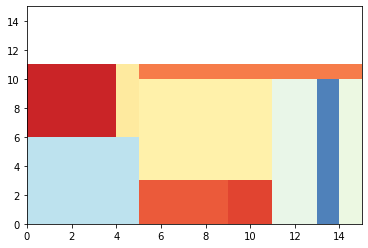

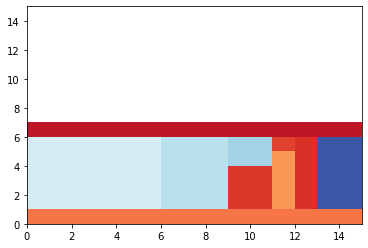

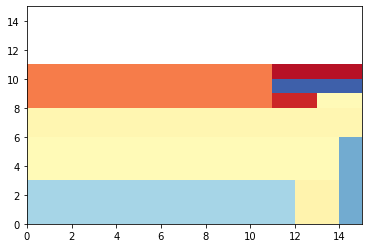

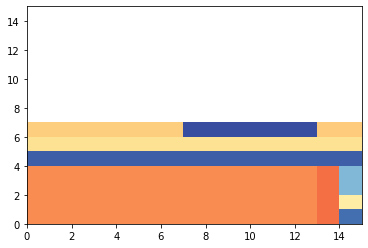

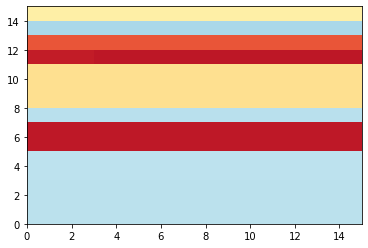

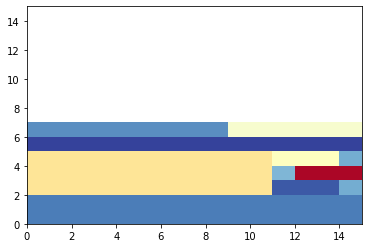

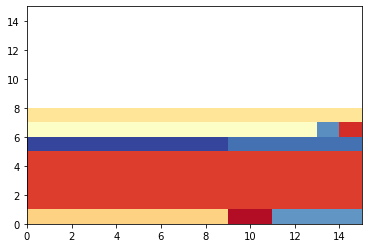

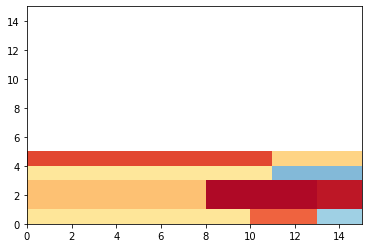

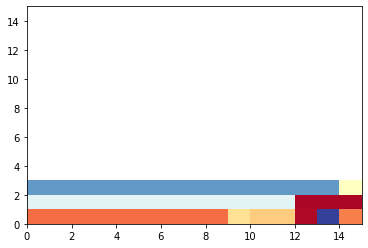

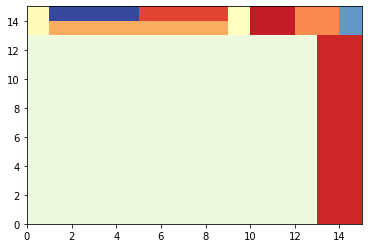

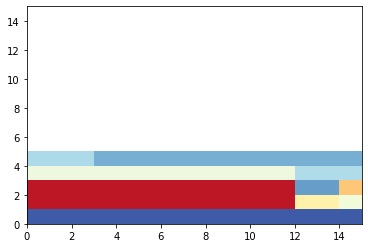

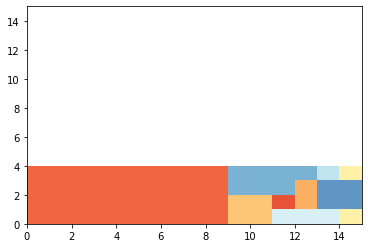

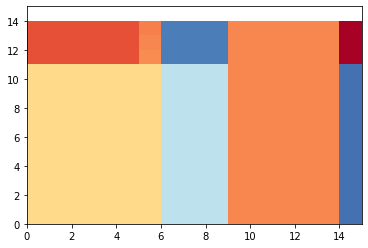

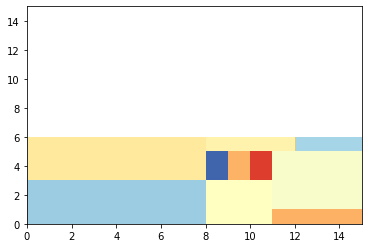

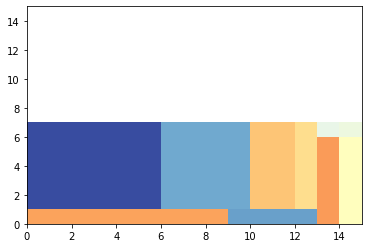

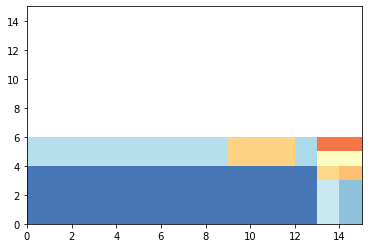

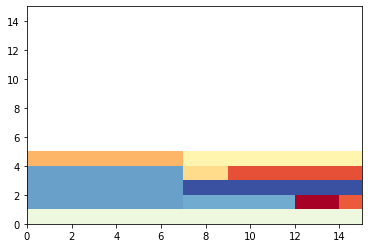

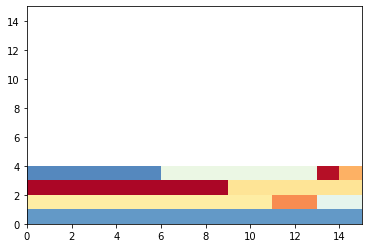

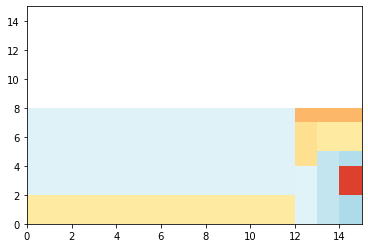

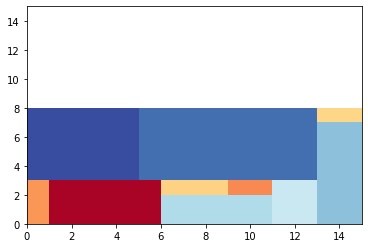

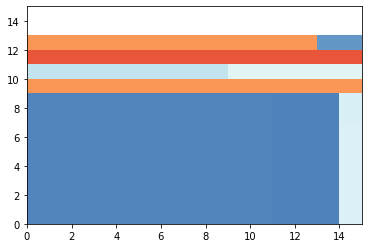

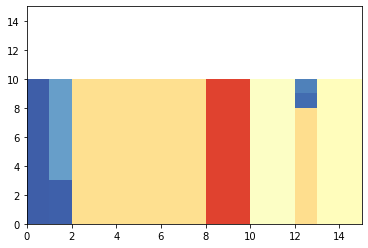

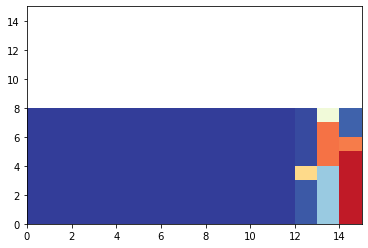

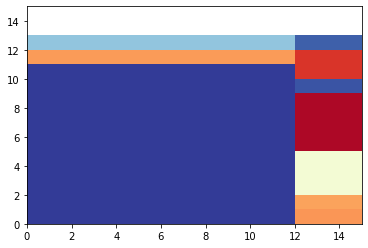

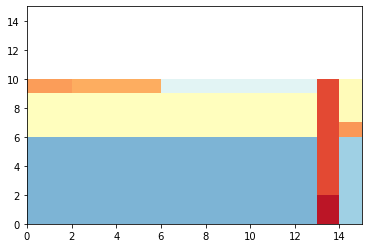

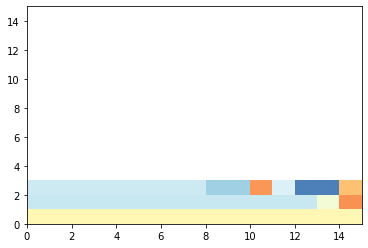

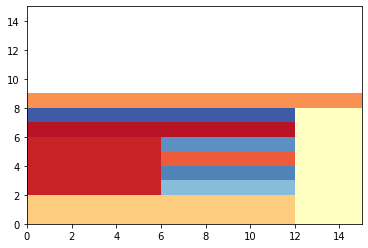

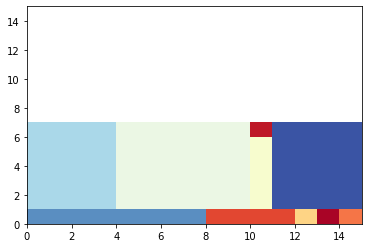

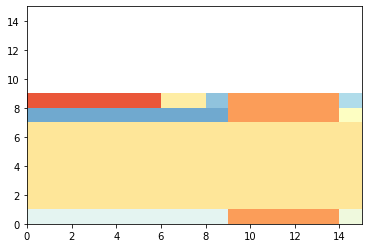

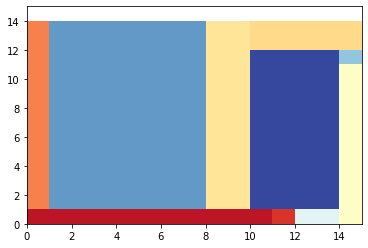

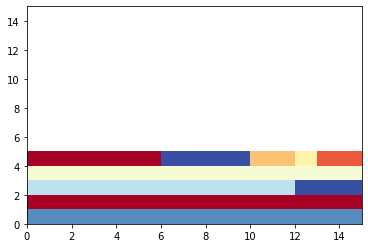

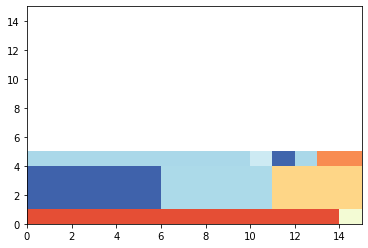

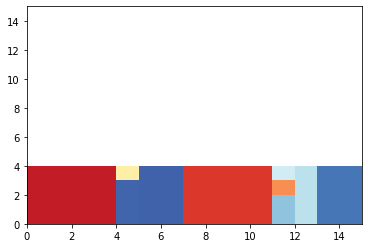

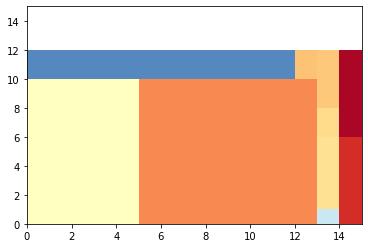

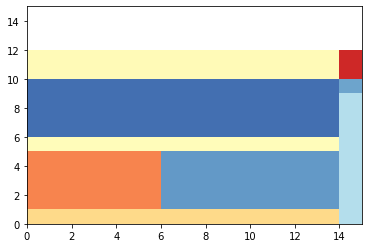

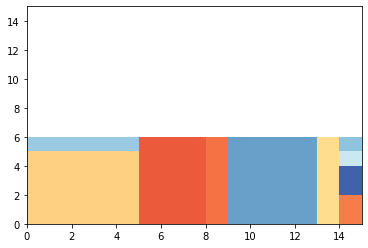

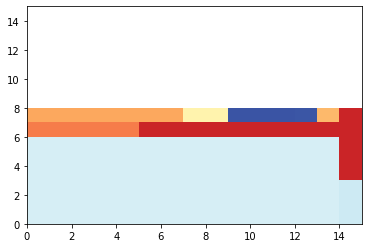

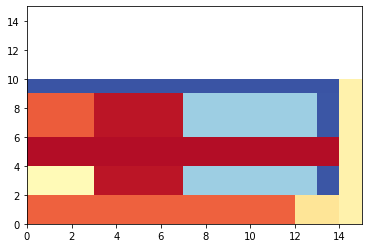

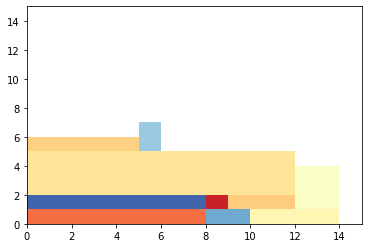

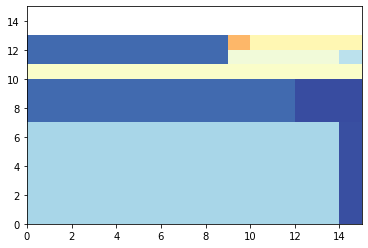

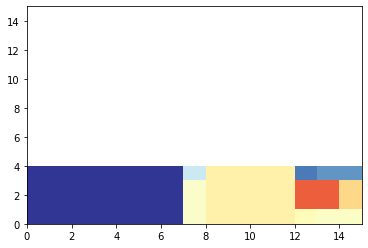

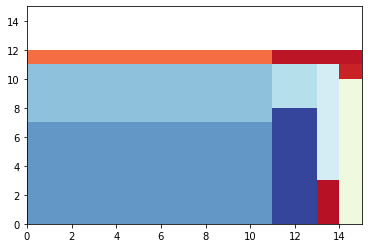

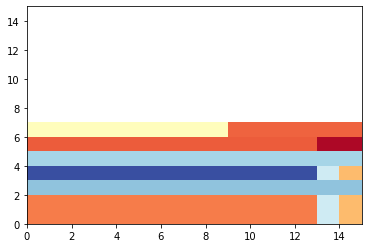

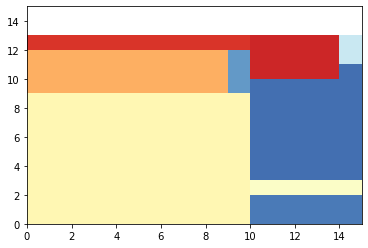

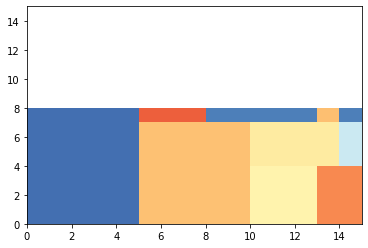

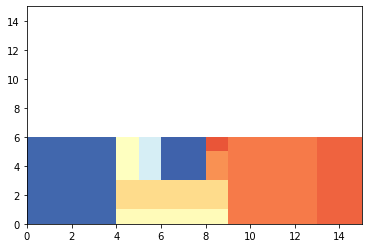

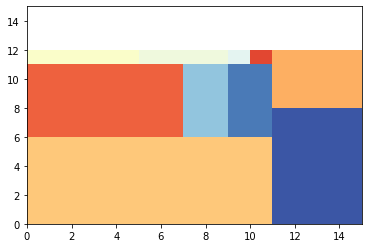

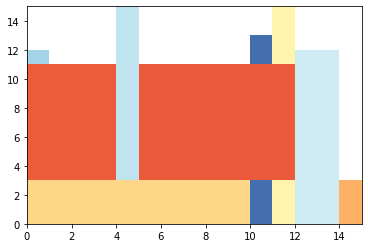

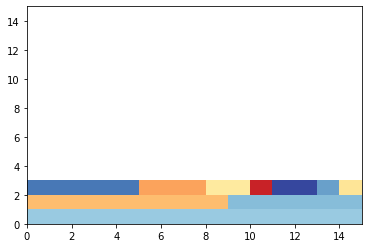

In [10]:
scores = []
# for i in range(5):
for i in range(len(eval_results)):
    placement_info = eval_results[i]
    scores.append(placement_info['score'])
    placement_info = placement_info['placement']
    items_list = []
    for j in range(len(placement_info)):
        (x, w, h) = placement_info[j]
        items_list.append([w, h, x])
    
#     if len(items_list) != numItems:
#         continue
    
    # display
    fig,ax=plt.subplots(1)
    plt.ylim(0,binHeight)
    plt.xlim(0,binWidth)
    colors=np.random.rand(numItems)
    cmap=plt.cm.RdYlBu_r
    c=cmap(colors)

    # an array for bin
    bin_game = np.zeros((15, 15))
    
    for n in range(len(items_list)):
        [w, h, x] = items_list[n]
        # for #n item:
        h_ = 0
        for tt in range(binHeight):
            if sum(bin_game[tt, x:x+w]) == 0:
                bin_game[tt, x:x+w] = 1
                h_ += 1
                rect=patches.Rectangle((x, tt), w, 1,
                                        facecolor = c[n],
                                        )
                ax.add_patch(rect)
                if h_ == h:
                    break
#     outfile = './results_pics/test_8_hvraa/%s.png' % (str(i))
#     outfile = './results_pics/test_real_site_du1/%s.png' % (str(i))
#     plt.savefig(outfile)
#     plt.show()

In [7]:
print(np.mean(scores))

0.9641190476190477


In [8]:
len(scores)

100

In [876]:
sum([item == max(scores) for item in scores]) / len(scores)

0.6

In [877]:
max(scores)

1.0

In [878]:
np.std(scores)

0.2786955192390429

In [6]:
eval_results[0]

{'placement': [[0, 3, 3],
  [3, 1, 3],
  [4, 4, 3],
  [8, 4, 1],
  [8, 2, 3],
  [10, 1, 3],
  [11, 1, 2],
  [12, 3, 2],
  [12, 1, 2],
  [0, 3, 1]],
 'score': 1.0}

In [879]:
scores = []
uti_all = []
for i in range(len(eval_results)):
    placement_info = eval_results[i]
    scores.append(placement_info['score'])
    placement_info = placement_info['placement']
    items_list = []
    for j in range(len(placement_info)):
        (x, w, h) = placement_info[j]
        items_list.append([w, h, x])
    
    if len(items_list) != numItems:
        continue

    # an array for bin
    bin_game = np.zeros((15, 15))
    
    for n in range(numItems):
        [w, h, x] = items_list[n]
        # for #n item:
        h_ = 0
        for tt in range(binHeight):
            if sum(bin_game[tt, x:x+w]) == 0:
                bin_game[tt, x:x+w] = 1
                h_ += 1
                if h_ == h:
                    break

    # get mean_utilisation from bin_game

    for tt in reversed(range(15)):
        if sum(bin_game[tt,:]) != 0:
            h_max = tt+1
            break

    uti = sum(sum(bin_game)) / (h_max*15)
    uti_all.append(uti)
print(np.mean(uti_all))   

0.7185454545454546


In [880]:
for i in range(len(scores)):
    if scores[i] == 1:
        print(i)

0
1
2
6
7
9
11
13
14
15
18
19


In [828]:
idx_sorted = np.argsort(scores)

In [829]:
idx_sorted

array([ 8, 17, 10,  5, 16,  3,  4, 12,  0, 15, 14, 13,  9, 18,  7,  6,  2,
        1, 11, 19])

In [830]:
len(idx_sorted[-10:])

10

In [837]:
aa = list(reversed(idx_sorted[-10:]))

In [838]:
aa

[19, 11, 1, 2, 6, 7, 18, 9, 13, 14]

In [833]:
aa[-1] = 12

In [834]:
aa

[19, 11, 1, 2, 6, 7, 18, 9, 13, 12]

In [870]:
np.mean([scores[t] for t in aa])

0.9380952380952381

In [871]:
np.mean([uti_all[t] for t in aa])

0.8096507936507937

In [780]:
[uti_all[t] for t in aa]

[0.8444444444444444,
 0.9428571428571428,
 0.9142857142857143,
 0.9523809523809523,
 0.9047619047619048,
 0.9714285714285714,
 0.8857142857142857,
 0.8083333333333333,
 0.6888888888888889,
 0.7777777777777778]

In [ ]:
# idx for du1: [9, 18, 17, 1, 4, 12, 8, 10, 2, 5]
# idx for du2: [19, 11, 1, 2, 6, 7, 18, 9, 13, 14]